## Initial EDA

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_style("dark")
import time
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,8)
import pickle
import re
import datetime as dt

In [4]:
df = pd.read_csv('data/train.csv')
df = df.set_index('Id')

### Add underscore to the beginning of column names that start with numbers

In [5]:
df.columns = list(map(lambda x: '_' + x if re.match('^\d', x) else x, df.columns))

In [6]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '_1stFlrSF', '_2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', '

In [7]:
pd.options.display.max_columns = 80
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,_1stFlrSF,_2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,_3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


#### Rename columns that start with numbers, contain period, or contain multiple consecutive underscores

### Automated dictionary creation for type of variable:

In [8]:
# %matplotlib inline
# typeConvertDict = {}
# for column in df.columns:
#     print(column)
#     sns.catplot(data = df, x = column, kind='count')
#     plt.show()
#     currentSuggestion = str(input(prompt = "Ordinal, Categorical, Float, Integer, or Boolean?"))
#     typeConvertDict[column] = currentSuggestion

# f = open("typeConvertDict.pkl","wb")
# pickle.dump(typeConvertDict,f)
# f.close()

In [9]:
with open('typeConvertDict.pkl', 'rb') as handle:
    typeConvertDict = pickle.load(handle) 
    
print(typeConvertDict)

{'MSSubClass': 'C', 'MSZoning': 'C', 'LotFrontage': 'F', 'LotArea': 'F', 'Street': 'C', 'Alley': 'C', 'LotShape': 'O?', 'LandContour': 'C', 'Utilities': 'C', 'LotConfig': 'C', 'LandSlope': 'O?', 'Neighborhood': 'C', 'Condition1': 'C', 'Condition2': 'C', 'BldgType': 'C', 'HouseStyle': 'C', 'OverallQual': 'O', 'OverallCond': 'O', 'YearBuilt': 'O(datetime)', 'YearRemodAdd': 'O(datetime)', 'RoofStyle': 'C', 'RoofMatl': 'C', 'Exterior1st': 'C', 'Exterior2nd': 'C', 'MasVnrType': 'C', 'MasVnrArea': 'I', 'ExterQual': 'O', 'ExterCond': 'O', 'Foundation': 'C', 'BsmtQual': 'O', 'BsmtCond': 'O', 'BsmtExposure': 'O', 'BsmtFinType1': 'O', 'BsmtFinSF1': 'I', 'BsmtFinType2': 'O', 'BsmtFinSF2': 'I', 'BsmtUnfSF': 'I', 'TotalBsmtSF': 'I', 'Heating': 'C', 'HeatingQC': 'O', 'CentralAir': 'B', 'Electrical': 'C', '_1stFlrSF': 'I', '_2ndFlrSF': 'I', 'LowQualFinSF': 'I', 'GrLivArea': 'I', 'BsmtFullBath': 'I', 'BsmtHalfBath': 'I', 'FullBath': 'I', 'HalfBath': 'I', 'BedroomAbvGr': 'I', 'KitchenAbvGr': 'I', 'Kitc

### Show histogram of Sale Prices to see distribution

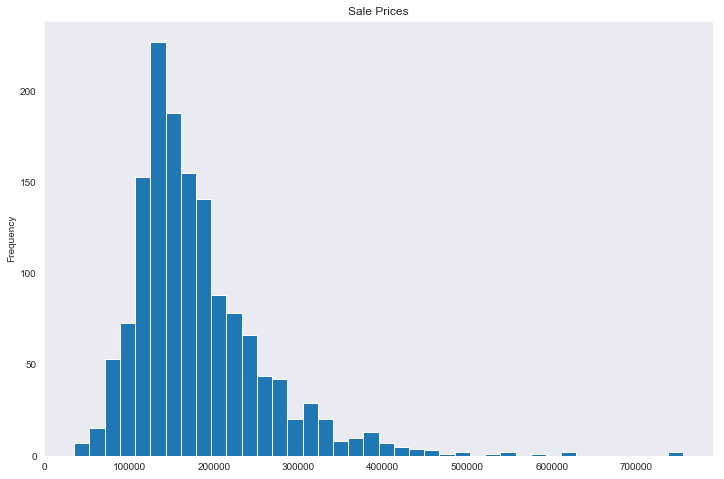

In [12]:
prices = df.SalePrice.plot(kind='hist', bins = 40)
title = plt.title('Sale Prices')

### Add MoYrSold column (as datetime object) and convert GarageTrBlt to datetime

In [13]:
df['MoYrSold'] = [str(m) + '/' + str(y) for m, y in zip(df.MoSold, df.YrSold)]

In [14]:
df.MoYrSold = df.MoYrSold.apply(lambda x: dt.datetime.strptime(x, '%m/%Y'))

In [15]:
df.GarageYrBlt.isnull().sum()

81

In [16]:
df.GarageYrBlt = [dt.datetime.strptime(str(int(x)), '%Y') if not pd.isnull(x) else x for x in df.GarageYrBlt]

#### Convert datetime to ordinal

In [17]:
garageyr = df.GarageYrBlt.copy()
garageyr = list(map(lambda x: x.toordinal() if not pd.isnull(x) else x, garageyr))

In [68]:
# Ordinal Encoding
# series = pd.Series(
#            np.random.randint(low=0, high=3, size=100))
# preserved_mapper = {2:'large', 1:'medium', 0:'small'}
# ordvar = series.replace(preserved_mapper)

### Convert appropriate category columns to ordinal

In [22]:
for pair in typeConvertDict:
    print('{} : {}'.format(pair, typeConvertDict[pair]))

MSSubClass : C
MSZoning : C
LotFrontage : F
LotArea : F
Street : C
Alley : C
LotShape : O?
LandContour : C
Utilities : C
LotConfig : C
LandSlope : O?
Neighborhood : C
Condition1 : C
Condition2 : C
BldgType : C
HouseStyle : C
OverallQual : O
OverallCond : O
YearBuilt : O(datetime)
YearRemodAdd : O(datetime)
RoofStyle : C
RoofMatl : C
Exterior1st : C
Exterior2nd : C
MasVnrType : C
MasVnrArea : I
ExterQual : O
ExterCond : O
Foundation : C
BsmtQual : O
BsmtCond : O
BsmtExposure : O
BsmtFinType1 : O
BsmtFinSF1 : I
BsmtFinType2 : O
BsmtFinSF2 : I
BsmtUnfSF : I
TotalBsmtSF : I
Heating : C
HeatingQC : O
CentralAir : B
Electrical : C
_1stFlrSF : I
_2ndFlrSF : I
LowQualFinSF : I
GrLivArea : I
BsmtFullBath : I
BsmtHalfBath : I
FullBath : I
HalfBath : I
BedroomAbvGr : I
KitchenAbvGr : I
KitchenQual : O
TotRmsAbvGrd : I
Functional : O?
Fireplaces : I
FireplaceQu : O
GarageType : C
GarageYrBlt : O(datetime)
GarageFinish : O
GarageCars : O
GarageArea : I
GarageQual : O
GarageCond : O
PavedDrive : O?


In [27]:
# ordinal_cols = ['LotShape', 'LandSlope', 'OverallQual', 'OverallCond', 'ExterQual', 'ExterCond', ]
ordinal_cols = []
typeConvertDict['MoYrSold'] = 'O(datetime)'

In [28]:
for col in df.columns:
    if typeConvertDict[col] in ['O', 'O?']:
        ordinal_cols.append(col)
        
ordinal_cols

['LotShape',
 'LandSlope',
 'OverallQual',
 'OverallCond',
 'ExterQual',
 'ExterCond',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'HeatingQC',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageFinish',
 'GarageCars',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence']